In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import csv
from PIL import Image, ImageDraw

In [4]:
xls = pd.ExcelFile('D:/M_Hajizadeh/to new pc/M Hajizadeh/Main works/to strasbourg pc/new simulation extended drainage time 19 october ( 8 steps )/simulation/Training.xlsx')
Inputs = pd.read_excel(xls, 'Inputs', header=None)
Outputs = pd.read_excel(xls, 'Outputs', header=None)

In [8]:
N_Data=50


number_of_time_steps=16

In [9]:
output_teta_images=np.zeros((20,20, number_of_time_steps, N_Data))


In [10]:
for image_number in range(0,N_Data):
    j=(image_number*118)+1
    for time in range(0,number_of_time_steps):
        i=0
        for row in range(0,20):
            for col in range(0,20):
                output_teta_images[row,col,time,image_number]=Outputs.iloc[i,j]
            i+=505
        j+=7

In [12]:
full_output_image=np.zeros((N_Data, 80,80, 1))
for image_number in range(0,N_Data):
    full_output_image[image_number, 0:20, 0:20, 0] = output_teta_images[:,:,0,image_number]/0.47
    full_output_image[image_number, 20:40, 0:20, 0] = output_teta_images[:,:,1,image_number]/0.47
    full_output_image[image_number, 40:60, 0:20, 0] = output_teta_images[:,:,2,image_number]/0.47
    full_output_image[image_number, 60:80, 0:20, 0] = output_teta_images[:,:,3,image_number]/0.47
    full_output_image[image_number, 0:20, 20:40, 0] = output_teta_images[:,:,4,image_number]/0.47
    full_output_image[image_number, 20:40, 20:40, 0] = output_teta_images[:,:,5,image_number]/0.47
    full_output_image[image_number, 40:60, 20:40, 0] = output_teta_images[:,:,6,image_number]/0.47
    full_output_image[image_number, 60:80, 20:40, 0] = output_teta_images[:,:,7,image_number]/0.47
    full_output_image[image_number, 0:20, 40:60, 0] = output_teta_images[:,:,8,image_number]/0.47
    full_output_image[image_number, 20:40,40:60, 0] = output_teta_images[:,:,9,image_number]/0.47
    full_output_image[image_number, 40:60,40:60, 0] = output_teta_images[:,:,10,image_number]/0.47
    full_output_image[image_number, 60:80, 40:60, 0] = output_teta_images[:,:,11,image_number]/0.47
    full_output_image[image_number, 0:20, 60:80, 0] = output_teta_images[:,:,12,image_number]/0.47
    full_output_image[image_number, 20:40,60:80, 0] = output_teta_images[:,:,13,image_number]/0.47
    full_output_image[image_number, 40:60, 60:80, 0] = output_teta_images[:,:,14,image_number]/0.47
    full_output_image[image_number, 60:80, 60:80, 0] = output_teta_images[:,:,15,image_number]/0.47

    
    
    
    

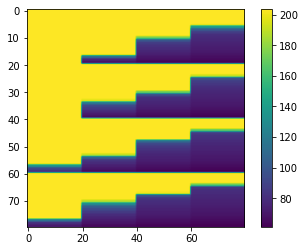

In [13]:
b=full_output_image[0, :, :, 0]*255
#plt.axis('off')
#plt.savefig('c.png')
plt.imshow(b)
plt.colorbar()
#plt.savefig('v.png')

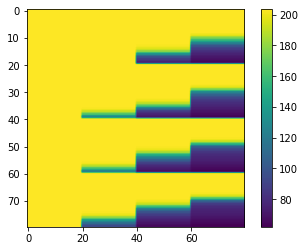

In [78]:
b=full_output_image[47, :, :, 0]*255
#plt.axis('off')
#plt.savefig('c.png')
plt.imshow(b)
plt.colorbar()
#plt.savefig('v.png')

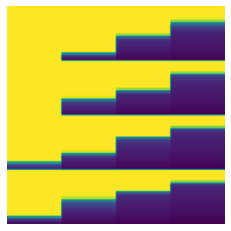

In [28]:
for h in range (0,N_Data):
    param = np.reshape(full_output_image[h, :, :, :], (80,80,1))
    plt.imshow(param)
    plt.axis('off')
    plt.savefig('moisture_map{}.jpg'.format(h+600), bbox_inches='tight',pad_inches = 0)

In [29]:
Ks_images, THs_images, THr_images, alpha_images, n_images =np.zeros((40,40,N_Data)), np.zeros((40,40,N_Data)), \
                                                           np.zeros((40,40,N_Data)), np.zeros((40,40,N_Data)), np.zeros((40,40,N_Data))

In [30]:
for image_number in range(0,N_Data):
    i=0
    for row in range(0,40):
        for col in range(0,40):
            Ks_images[row,col,image_number], THs_images[row,col,image_number], THr_images[row,col,image_number], \
            alpha_images[row,col,image_number], n_images[row,col,image_number]\
                =Inputs.iloc[i,image_number*5], Inputs.iloc[i,1+image_number*5], Inputs.iloc[i,2+image_number*5], \
                 Inputs.iloc[i,3+image_number*5], Inputs.iloc[i,4+image_number*5]
            i+=6

In [58]:
i

9600

In [31]:
full_input_image=np.zeros((N_Data, 80,80,1))
for image_number in range(0,N_Data):
    full_input_image[image_number, 0:40, 0:40, 0] = (Ks_images[:,:,image_number]-0.001)/(0.03-0.001) #0.001, 0.005
    #full_input_image[image_number, 40:80, 0:40, 0] = (THs_images[:,:,image_number]-0.2)/(0.5-0.2) #0.2, 0.5
    #full_input_image[image_number, 80:120, 0:60, 0] = (THr_images[:,:,image_number])/0.25
    full_input_image[image_number, 40:80, 0:40, 0] = (alpha_images[:,:,image_number]-0.001)/(0.2-0.001)#0.001, 0.2
    full_input_image[image_number, 0:40, 40:80, 0] = (n_images[:,:,image_number]-2)/(8-2)

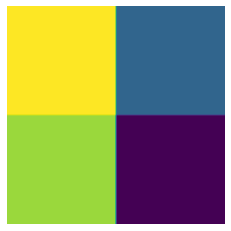

In [32]:
for h in range (0,N_Data):
    param = np.reshape(full_input_image[h, :, :, :], (80,80,1))
    plt.imshow(param)
    plt.axis('off')
    plt.savefig('parameter{}.jpg'.format(h+600), bbox_inches='tight',pad_inches = 0)